In [1]:
import json

In [2]:
with open('/Users/kanhagannu/Desktop/Yuvi_RIP.json') as f:
    data = json.load(f)

In [3]:
len(data)

9189

In [4]:
data[0]

{'_id': {'$oid': '5ee1244dc51e2d8beb570717'},
 'created_at': 'Wed Jun 10 18:19:05 +0000 2020',
 'id': 1270782555357212700,
 'id_str': '1270782555357212672',
 'full_text': 'RT @PTTVOnlineNews: திமுக எம்எல்ஏ ஜெ.அன்பழகன் மறைவுக்கு சீமான் இரங்கல்..!\n\n| #JAnbazhagan | #RestInPeace | #DMK | #coronavirus | #Seeman ht…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'text': 'JAnbazhagan', 'indices': [77, 89]},
   {'text': 'RestInPeace', 'indices': [92, 104]},
   {'text': 'DMK', 'indices': [107, 111]},
   {'text': 'coronavirus', 'indices': [114, 126]},
   {'text': 'Seeman', 'indices': [129, 136]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'PTTVOnlineNews',
    'name': 'PuthiyathalaimuraiTV',
    'id': 622872390,
    'id_str': '622872390',
    'indices': [3, 18]}],
  'urls': []},
 'metadata': {'iso_language_code': 'ta', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_st

In [5]:
tweets_yuvi = 0
tweets_rest = 0
tweets_both = 0
uy = {}
ur = {}
uyr = {}

In [6]:
from collections import defaultdict 
y_tag = defaultdict (int)
r_tag = defaultdict (int)
yr_tag = defaultdict (int)

In [7]:
for i in range(len(data)):
    if len(data[i]['entities']['hashtags'])==1:
        if data[i]['entities']['hashtags'][0]['text']=='MissYouYuvi':
            tweets_yuvi+=1
            d = data[i]['created_at'].split()[3].split(':')[0]
            y_tag[d]+=1
            s = data[i]['user']['id_str']
            if data[i]['user']['verified']==True:
                uy[s] = 1
            else:
                uy[s] = 0

In [8]:
for i in range(len(data)):
    if len(data[i]['entities']['hashtags'])==1:
        if data[i]['entities']['hashtags'][0]['text']=='RestInPeace':
            tweets_rest+=1
            d = data[i]['created_at'].split()[3].split(':')[0]
            r_tag[d]+=1
            s = data[i]['user']['id_str']
            if data[i]['user']['verified']==True:
                ur[s] = 1
            else:
                ur[s] = 0

In [9]:
for i in range(len(data)):
    if len(data[i]['entities']['hashtags'])==2:
        if (data[i]['entities']['hashtags'][0]['text']==('RestInPeace' or 'MissYouYuvi'))and(data[i]['entities']['hashtags'][1]['text']==('RestInPeace' or 'MissYouYuvi')):
            tweets_both+=1
            d = data[i]['created_at'].split()[3].split(':')[0]
            yr_tag[d]+=1
            s = data[i]['user']['id_str']
            if data[i]['user']['verified']==True:
                uyr[s] = 1
            else:
                uyr[s] = 0

In [10]:
ver_y = 0
uver_y = 0
for key in uy:
    if uy[key]==1:
        ver_y+=1
    else:
        uver_y+=1
ver_r = 0
uver_r = 0
for key in ur:
    if ur[key]==1:
        ver_r+=1
    else:
        uver_r+=1
ver_yr = 0
uver_yr = 0
for key in uyr:
    if uyr[key]==1:
        ver_yr+=1
    else:
        uver_yr+=1

In [11]:
tweets_yuvi,tweets_rest,tweets_both

(4606, 90, 0)

In [12]:
ver_y,uver_y,ver_r,uver_r,ver_yr,uver_yr

(10, 1231, 1, 83, 0, 0)

In [13]:
date = sorted(list(y_tag.keys()))
date

['09', '10', '11', '12', '13', '14', '15', '16', '17', '18']

In [14]:
bar1 = [y_tag[i] for i in date]
bar2 = [r_tag[i] for i in date]
bar3 = [yr_tag[i] for i in date]

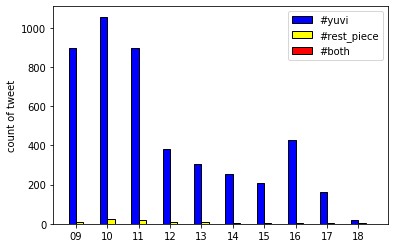

<Figure size 2160x720 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.7
# The x position of bars
r1 = np.arange(len(bar1))*3
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bar1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='#yuvi',align='edge')
plt.bar(r2, bar2, width = barWidth, color = 'yellow', edgecolor = 'black', capsize=7, label='#rest_piece',align='edge')
plt.bar(r3, bar3, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='#both',align='edge')

# general layout
plt.xticks([r + barWidth for r in r1], date)
plt.ylabel('count of tweet')
plt.legend()
plt.figure(figsize=(30, 10))
# Show graphic
plt.show()